In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Ορισμός του πλέγματος
def create_grid(nx, xmin, xmax):
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax - xmin) / (nx - 1)
    return x, dx

# Ορισμός της μεθόδου FTCS
def ftcs(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2])
    return u

# Ορισμός της μεθόδου upwind
def upwind(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - C * (u[n, 1:-1] - u[n, :-2])
    return u

# Ορισμός της μεθόδου Crank-Nicolson
def crank_nicolson(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0
    
    a = (-C/4) * np.ones(nx - 1)
    b =  np.ones(nx)
    c = (C/4) * np.ones(nx - 1)
    
    for n in range(nt - 1):
        d = u[n, 1:-1] - C/4 * (u[n, 2:] - u[n, :-2])
        A = np.diag(a, -1) + np.diag(b) + np.diag(c, 1)
        u[n + 1, 1:-1] = np.linalg.solve(A[1:-1, 1:-1], d)
    
    return u

# Ορισμός της συνάρτησης για το γράφημα
def plot_solution(x, u0, u_numerical, u_analytic, C):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()

    for i, C_val in enumerate(C):

        axs[i].plot(x, u0, '--', label='Αρχική συνθήκη')
        axs[i].plot(x, u_analytic[i], '--', label='Αναλυτική λύση')
        axs[i].plot(x, u_numerical[i][-1], label='Αριθμητική λύση')
        axs[i].set_xlim([xmin, xmax])
        axs[i].set_xlabel("x")
        axs[i].set_ylabel("u")
        axs[i].set_title(f'C={C_val}')
        axs[i].legend()

    plt.show()

    return fig


In [3]:
# Ορισμός των παραμέτρων
nx = 1000  # Αριθμός σημείων στο πλέγμα
xmin = -8  # Ελάχιστη τιμή του x
xmax = 8  # Μέγιστη τιμή του x
nt = 300  # Αριθμός χρονικών βημάτων
tstart = 0  # Αρχική χρονική στιγμή
tend = 3  # Τελική χρονική στιγμή
dt = (tend - tstart) / (nt - 1)  # Χρονικό βήμα
C_values = np.array([0.1, 0.2, 0.4, 0.5])  # Τιμές του C

x, dx = create_grid(nx, xmin, xmax)  # Δημιουργία του πλέγματος
u0 = np.exp(-x ** 2)  # Αρχική κατάσταση


In [ ]:

# Υπολογισμός αναλυτικών λύσεων
u_analytic = np.exp(-(x - C_values[:, np.newaxis] * (dx / dt) * tend) ** 2)

# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο FTCS
u_numerical = [ftcs(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
fig = plot_solution(x, u0, u_numerical, u_analytic, C_values)

# Αποθήκευση του γραφήματος ως pdf
fig.savefig('ftcs.pdf', bbox_inches='tight')


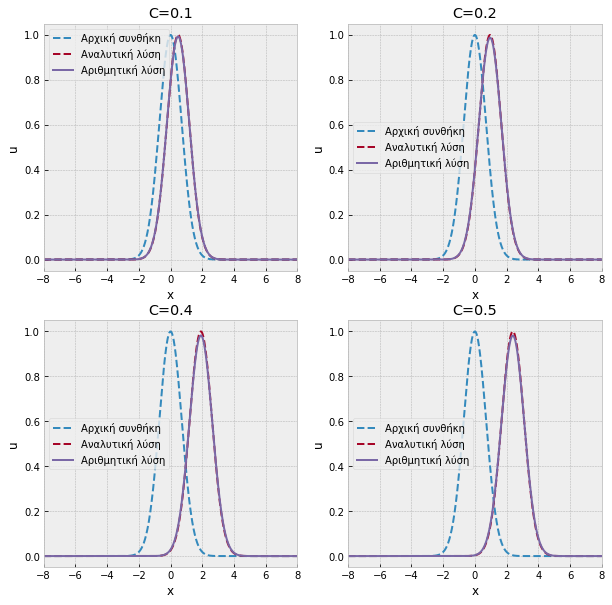

In [11]:
# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο Upwind
u_numerical = [upwind(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
fig = plot_solution(x, u0, u_numerical, u_analytic, C_values)

# Αποθήκευση του γραφήματος ως pdf
fig.savefig('upwind.pdf', bbox_inches='tight')

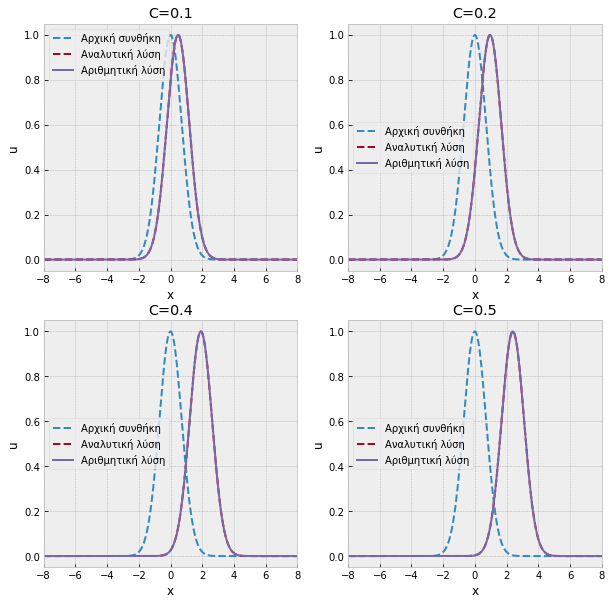

In [12]:
# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο Crank-Nicolson
u_numerical = [crank_nicolson(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
fig = plot_solution(x, u0, u_numerical, u_analytic, C_values)

# Αποθήκευση του γραφήματος ως pdf
fig.savefig('CN.pdf', bbox_inches='tight')

In [5]:
# Ορισμός της μεθόδου Lax-Wendroff
def lax_wendroff(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    
    for n in range(nt - 1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2]) + (C**2/2) * (u[n, 2:] - 2*u[n, 1:-1] + u[n, :-2])
    
    return u


In [ ]:

# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο Lax-Wendroff method
u_numerical = [lax_wendroff(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
fig = plot_solution(x, u0, u_numerical, u_analytic, C_values)

# Αποθήκευση του γραφήματος ως pdf
fig.savefig('LW.pdf', bbox_inches='tight')

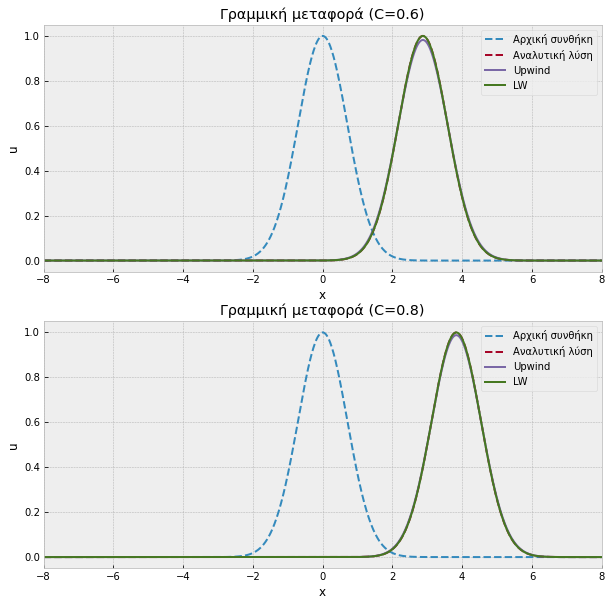

In [6]:
C_values = np.array([0.6, 0.8])

u_numerical_upwind = [upwind(nt, nx, u0, C) for C in C_values]

u_numerical_lax_wendroff = [lax_wendroff(nt, nx, u0, C) for C in C_values]

u_analytic = np.exp(-(x - C_values[:, np.newaxis] * (dx / dt) * tend) ** 2)


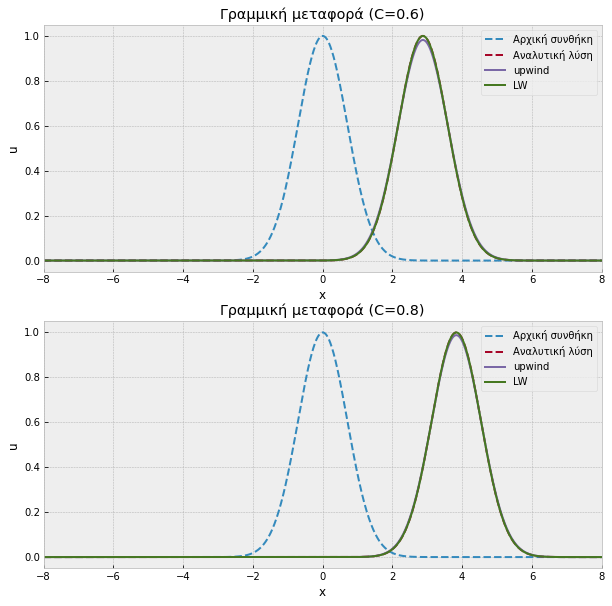

In [7]:

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Προβολή των λύσεων για C=0.6
axs[0].plot(x, u0, '--', label='Αρχική συνθήκη')
axs[0].plot(x, u_analytic[0], '--', label='Αναλυτική λύση')
axs[0].plot(x, u_numerical_upwind[0][-1], label='upwind')
axs[0].plot(x, u_numerical_lax_wendroff[0][-1], label='LW')
axs[0].set_xlim([xmin, xmax])
axs[0].set_xlabel("x")
axs[0].set_ylabel("u")
axs[0].set_title("Γραμμική μεταφορά (C=0.6)")
axs[0].legend()

# Προβολή των λύσεων για C=0.8
axs[1].plot(x, u0, '--', label='Αρχική συνθήκη')
axs[1].plot(x, u_analytic[1], '--', label='Αναλυτική λύση')
axs[1].plot(x, u_numerical_upwind[1][-1], label='upwind')
axs[1].plot(x, u_numerical_lax_wendroff[1][-1], label='LW')
axs[1].set_xlim([xmin, xmax])
axs[1].set_xlabel("x")
axs[1].set_ylabel("u")
axs[1].set_title("Γραμμική μεταφορά (C=0.8)")
axs[1].legend()

plt.show()

fig.savefig('comb.pdf', bbox_inches='tight')


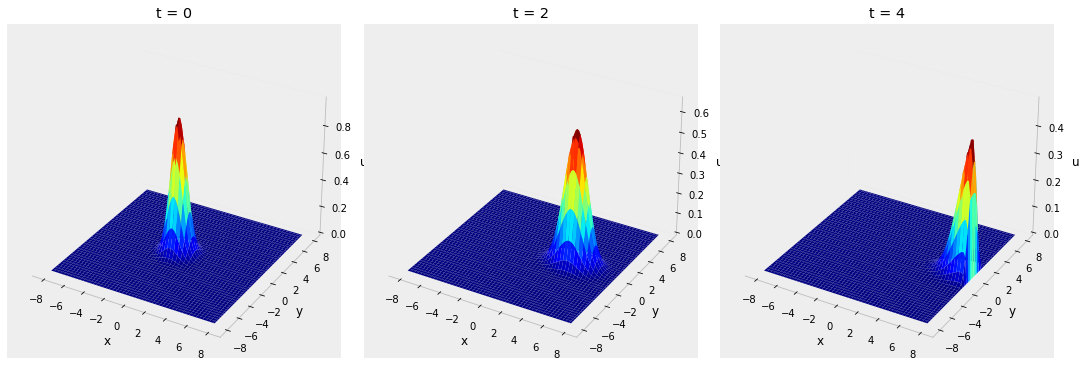

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός των παραμέτρων
nx = 100  # Αριθμός σημείων στον άξονα x
ny = 100  # Αριθμός σημείων στον άξονα y
xmin = -8  # Ελάχιστη τιμή του x
xmax = 8  # Μέγιστη τιμή του x
ymin = -8  # Ελάχιστη τιμή του y
ymax = 8  # Μέγιστη τιμή του y
nt = 100  # Αριθμός χρονικών βημάτων
tstart = 0  # Αρχική χρονική στιγμή
tend = 4  # Τελική χρονική στιγμή
dt = (tend - tstart) / (nt - 1)  # Μέγεθος χρονικού βήματος
C = 0.5  # Αριθμός Courant

# Δημιουργία του πλέγματος
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)
X, Y = np.meshgrid(x, y)

# Αρχική συνθήκη, gaussιανή καμπάνα
u = np.zeros((nt, ny, nx))
u[0] = np.exp(-(X ** 2 + Y ** 2))

# Επίλυση της εξίσωσης μεταφοράς χρησιμοποιώντας την πεπλεγμένη FTCS μεθόδο
for n in range(nt - 1):
    u[n + 1, 1:-1, 1:-1] = u[n, 1:-1, 1:-1] - C * (u[n, 1:-1, 1:-1] - u[n, 1:-1, :-2]) + (C ** 2 / 2) * (
            u[n, 1:-1, 2:] - 2 * u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2])
# Δημιουργία ενός νέου σχήματος και άξονα
fig = plt.figure(figsize=(15, 5))

# Επανάληψη για τις 3 χρονικές στιγμές
for i, t in enumerate([0, 2, 4]):
    # Δημιουργία νέου υποσχήματος
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Δημιουργία του πλέγματος για τις συντεταγμένες x, y και z
    X, Y = np.meshgrid(x, y)
    Z = u[int(t / dt)]

    # Προβολή της επιφάνειας
    surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

    # Ορισμός των ετικετών και του τίτλου
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_title(f't = {t}')

    # Αφαίρεση του φόντου
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)

# Εμφάνιση του γραφήματος
plt.tight_layout()
plt.show()

# Αποθήκευση του γραφήματος ως pdf
fig.savefig('tran2d.pdf', bbox_inches='tight')